## zad.1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplementuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [1]:
using Polynomials, QuadGK, Plots, DataFrames

In [2]:
function legendre_poly(k)
    if k == 0
        return Polynomial([1])
    elseif k == 1
        return Polynomial([0,1])
    end

    m = zeros(Float64, k + 1, k + 1)
    m[1, 1] = 1
    m[2, 2] = 1
    for i in 3:k+1
        for j in 1:k
            a = i - 2
            m[i, j + 1] = m[i, j + 1] + (2 * a + 1) * m[i - 1, j] / (a + 1)
            m[i, j] = m[i, j] - a * m[i - 2, j] / (a + 1)
        end
    end
    return Polynomial([coeff for coeff in m[k + 1,:]])
end

legendre_poly (generic function with 1 method)

In [3]:
X = -1:0.01:1

-1.0:0.01:1.0

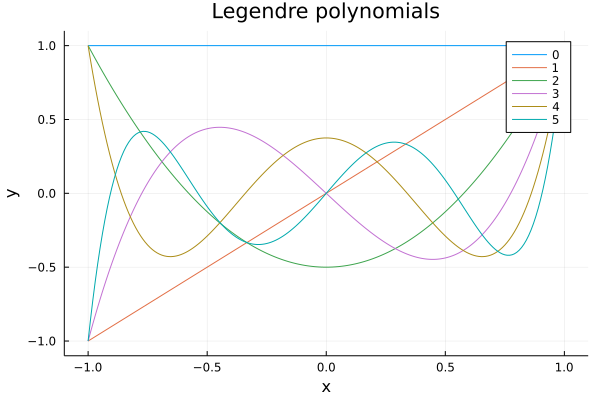

In [4]:
plot(X, [legendre_poly(0)(x) for x in X], label = "0")
plot!(X, [legendre_poly(1)(x) for x in X], label = "1")
plot!(X, [legendre_poly(2)(x) for x in X], label = "2")
plot!(X, [legendre_poly(3)(x) for x in X], label = "3")
plot!(X, [legendre_poly(4)(x) for x in X], label = "4")
plot!(X, [legendre_poly(5)(x) for x in X], label = "5", xlims=(-1.1, 1.1), ylims=(-1.1,1.1), title="Legendre polynomials", xlab="x", ylab="y")

In [5]:
for i in 1:4
    println("   gauss: ", gauss(Float64,i)[1])
    println("legendre: ", sort(roots(legendre_poly(i))))
    println("------------------------------------------")
end

   gauss: [0.0]
legendre: [0.0]
------------------------------------------
   gauss: [-0.5773502691896258, 0.5773502691896258]
legendre: [-0.5773502691896258, 0.5773502691896256]
------------------------------------------
   gauss: [-0.7745966692414834, 0.0, 0.7745966692414834]
legendre: [-0.7745966692414834, 0.0, 0.7745966692414835]
------------------------------------------
   gauss: [-0.8611363115940526, -0.3399810435848563, 0.3399810435848563, 0.8611363115940526]
legendre: [-0.8611363115940536, -0.33998104358485653, 0.3399810435848563, 0.8611363115940531]
------------------------------------------


Odcięte $ x_i $ n-punktowej kwadratury Gaussa z funkcją wagowa $ w(x) $ w [a,b] są zerami wielomianu ortogonalnego $ φ_n(x) $ dla tego samego przedziału i tej samej funkcji ważącej.

## zad.2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [6]:
function int(f, k)
    xp, a = gauss(Float64, k)
    return sum(a .* f.(xp))
end    

int (generic function with 1 method)

In [7]:
df = DataFrame(result = Float64[], expected = Float64[], difference = Float64[], deg = Int64[])

for deg in 1:20
    res = int(x -> 50 * x ^ deg, 6)
    expected = (50 / (deg + 1)) * (1^(deg + 1) - (-1)^(deg + 1))
    push!(df, [res, expected, abs(res - expected), deg])
end

df

,result,expected,difference,deg
,Float64,Float64,Float64,Int64
1,8.88178e-16,0.0,8.88178e-16,1
2,33.3333,33.3333,7.10543e-15,2
3,-8.88178e-16,0.0,8.88178e-16,3
4,20.0,20.0,7.10543e-15,4
5,0.0,0.0,0.0,5
6,14.2857,14.2857,5.32907e-15,6
7,0.0,0.0,0.0,7
8,11.1111,11.1111,8.88178e-15,8
9,0.0,0.0,0.0,9


Suma przestaje być dokładna przy wielomianie stopnia 12 dla używanej tutaj 6-cio punktowej kwadratury, ma to związek z twierdzeniem o stopniu dokładności kwadratury Gaussa.

### Twierdzenie o stopniu dokładności kwadratury Gaussa
Kwadratura ma stopien dokladnosci $ 2n - 1 $ dla $ n $ punktowej kwadratury

## zad.3
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.

In [8]:
function int_w(f, k, a, b)
    xp, w = gauss(Float64, k)
    xp = ((b - a) / 2) * xp .+ (b + a) / 2
    return ((b - a) / 2) * sum(w .* f.(xp))
end

int_w (generic function with 1 method)

In [9]:
df = DataFrame(fun = String[], quad = Int64[], result = Float64[], expected = Float64[], difference = Float64[])

f = x -> x^5
res = int_w(f, 5, 5, 8)
exp = 41086.5
push!(df, ["x^5", 5, res, exp, abs(res - exp)])

f = x -> sin(x)
res = int_w(f, 5, 5, 8)
exp = 0.4291622192718397903354806
push!(df, ["sin(x)", 5, res, exp, abs(res - exp)])
res = int_w(f, 3, 5, 8)
push!(df, ["sin(x)", 3, res, exp, abs(res - exp)])

f = x -> 2^x
res = int_w(f, 3, 5, 8)
exp = 323.1636891591278032486231
push!(df, ["2^x", 3, res, exp, abs(res - exp)])
res = int_w(f, 5, 5, 8)
push!(df, ["2^x", 5, res, exp, abs(res - exp)])

f = x -> 1/x
res = int_w(f, 3, 5, 8)
exp = 0.470003629245735553650937
push!(df, ["1/x", 3, res, exp, abs(res - exp)])
res = int_w(f, 5, 5, 8)
push!(df, ["1/x", 5, res, exp, abs(res - exp)])

,fun,quad,result,expected,difference
,String,Int64,Float64,Float64,Float64
1,x^5,5,41086.5,41086.5,7.27596e-12
2,sin(x),5,0.429162,0.429162,1.43495e-8
3,sin(x),3,0.42938,0.429162,0.000217803
4,2^x,3,323.152,323.164,0.0112545
5,2^x,5,323.164,323.164,1.65583e-7
6,1/x,3,0.470002,0.470004,1.74849e-6
7,1/x,5,0.470004,0.470004,3.36076e-10


## zad.4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności.


 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [10]:
test_poly = Polynomial([65, 3, 32, 65, -24, -3, 3, -23, 34])
val, err = quadgk(test_poly, 5, 8)

(4.5321536551071435e8, 5.960464477539063e-8)

In [11]:
norm_dist = x -> (1/sqrt(2 * pi)) * Base.exp((-x^2) / 2)
val, err = quadgk(norm_dist, -Inf, Inf)

(1.0000000000032583, 1.4395584885993386e-8)

## zad.5
Napisz własne funkcje całkujące -  w wybranym przedziale (a,b) - złożonymi metodami prostokątów, trapezów oraz Simpsona. Dla stałego przedziału zwiększaj liczbę użytych punktów (n). Narysuj wykresy funkcji błędu  w stosunku do wyniku otrzymanego analitycznie, 
w zależnosci od $h=\frac{b-a}{n}$:
1. wykładniczej
2. trygonometrycznej (np. sin (x) w przedziale $[0,2\pi]$)

In [12]:
function int_rec(f, n, a, b)
    value = 0
    h = (b-a)/n
    for i in 1:n
       value += f(a + (i-1)*h + h/2) * h
    end
    return value
end

int_rec (generic function with 1 method)

In [13]:
function int_trap(f, n, a, b)
    value = 0
    h = (b-a)/n
    for i in 1:n
       value += (f(a + (i-1) * h) + f(a + i * h)) * h
    end
    return value / 2
end

int_trap (generic function with 1 method)

In [14]:
function int_simp(f, n, a, b)
    value = 0
    h = (b-a)/n
    x = a
    for i in 1:n
       value += f(x) + 4 * f((x + (x + h)) / 2) + f(x + h)
       x += h
    end
    return value * h / 6
end

int_simp (generic function with 1 method)

In [15]:
f = x -> Base.exp(x)

ef = DataFrame(n = Int64[], method = String[], error = Float64[])
for n in 1:1:150
    push!(ef, [n "rec" abs(int_rec(f, n, 0, 5) - (Base.exp(5) - 1))])
    push!(ef, [n "trap" abs(int_trap(f, n, 0, 5) - (Base.exp(5) - 1))])
    push!(ef, [n "simp" abs(int_simp(f, n, 0, 5) - (Base.exp(5) - 1))])
end
ef

,n,method,error
,Int64,String,Float64
1,1,rec,86.5007
2,1,trap,226.12
3,1,simp,17.7061
4,2,rec,32.3846
5,2,trap,69.8095
6,2,simp,1.68011
7,3,rec,15.7739
8,3,trap,32.6413
9,3,simp,0.364519


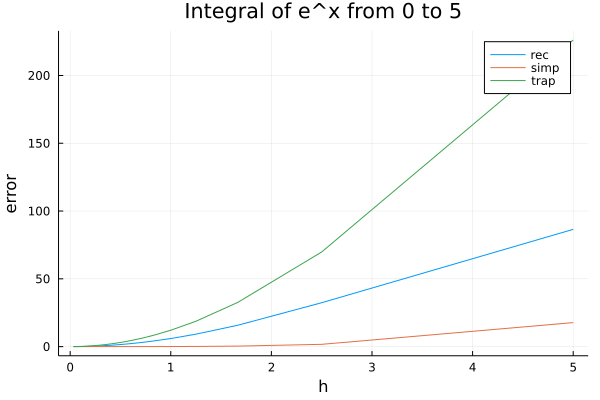

In [16]:
plot(5 ./ ef.n, ef.error, group=ef.method, title="Integral of e^x from 0 to 5", ylabel="error", xlabel="h")

In [17]:
f = x -> sin(x)

ef = DataFrame(n = Int64[], method = String[], error = Float64[])
for n in 1:1:150
    push!(ef, [n "rec" abs(int_rec(f, n, 0, 2*pi) - (-cos(2*pi) + cos(0)))])
    push!(ef, [n "trap" abs(int_trap(f, n, 0, 2*pi) - (-cos(2*pi) + cos(0)))])
    push!(ef, [n "simp" abs(int_simp(f, n, 0, 2*pi) - (-cos(2*pi) + cos(0)))])
end
ef

,n,method,error
,Int64,String,Float64
1,1,rec,7.69468e-16
2,1,trap,7.69468e-16
3,1,simp,2.56489e-16
4,2,rec,0.0
5,2,trap,0.0
6,2,simp,0.0
7,3,rec,6.66134e-16
8,3,trap,2.22045e-16
9,3,simp,3.10033e-16


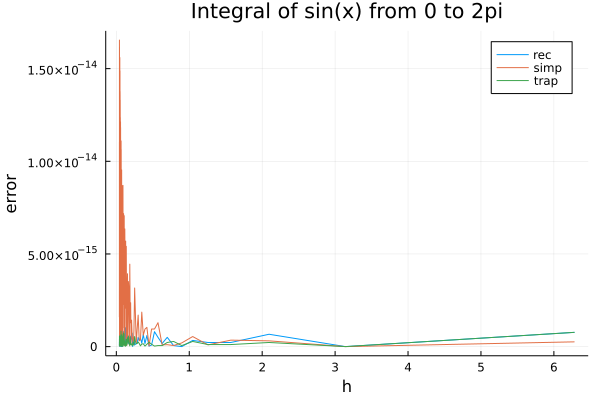

In [18]:
plot(2*pi ./ ef.n, ef.error, group=ef.method, title="Integral of sin(x) from 0 to 2pi", ylabel="error", xlabel="h")